In [127]:
import pandas as pd


In [128]:
df = pd.read_csv('Boston.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [129]:
del df['Unnamed: 0']

In [130]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [131]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

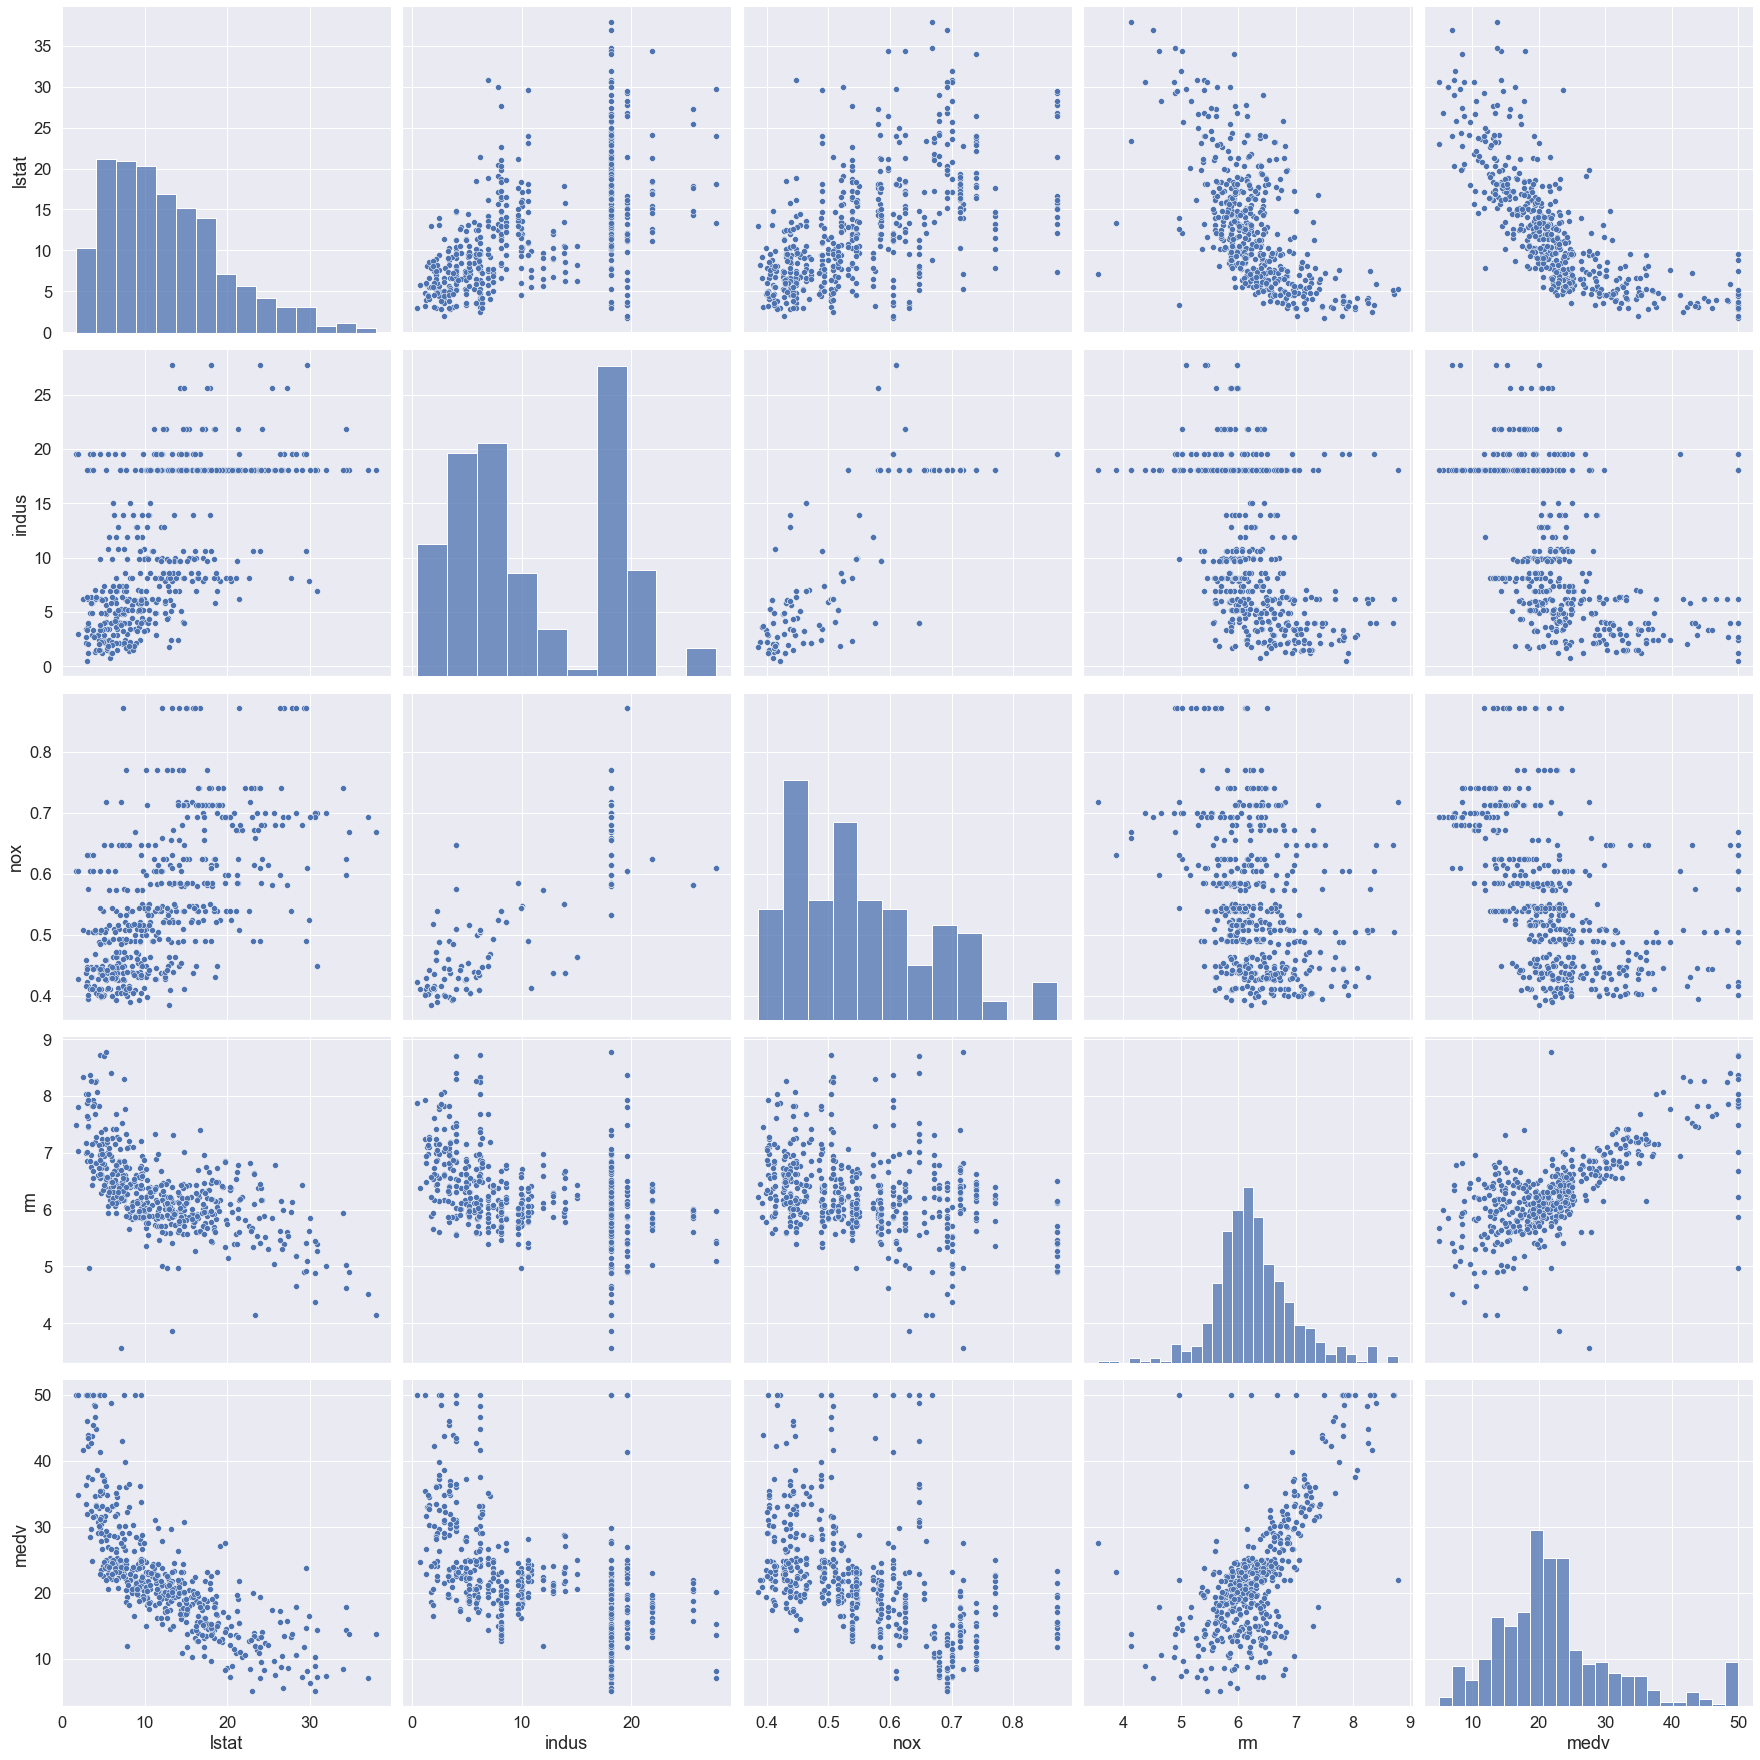

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

cols1 = ['lstat', 'indus', 'nox', 'rm', 'medv']
cols2 = ['crim', 'zn', 'chas', 'age', 'medv']
cols3 = ['dis', 'rad', 'tax', 'ptratio', 'black','medv']

sns.pairplot(df[cols1], height=5)
plt.tight_layout
plt.show()

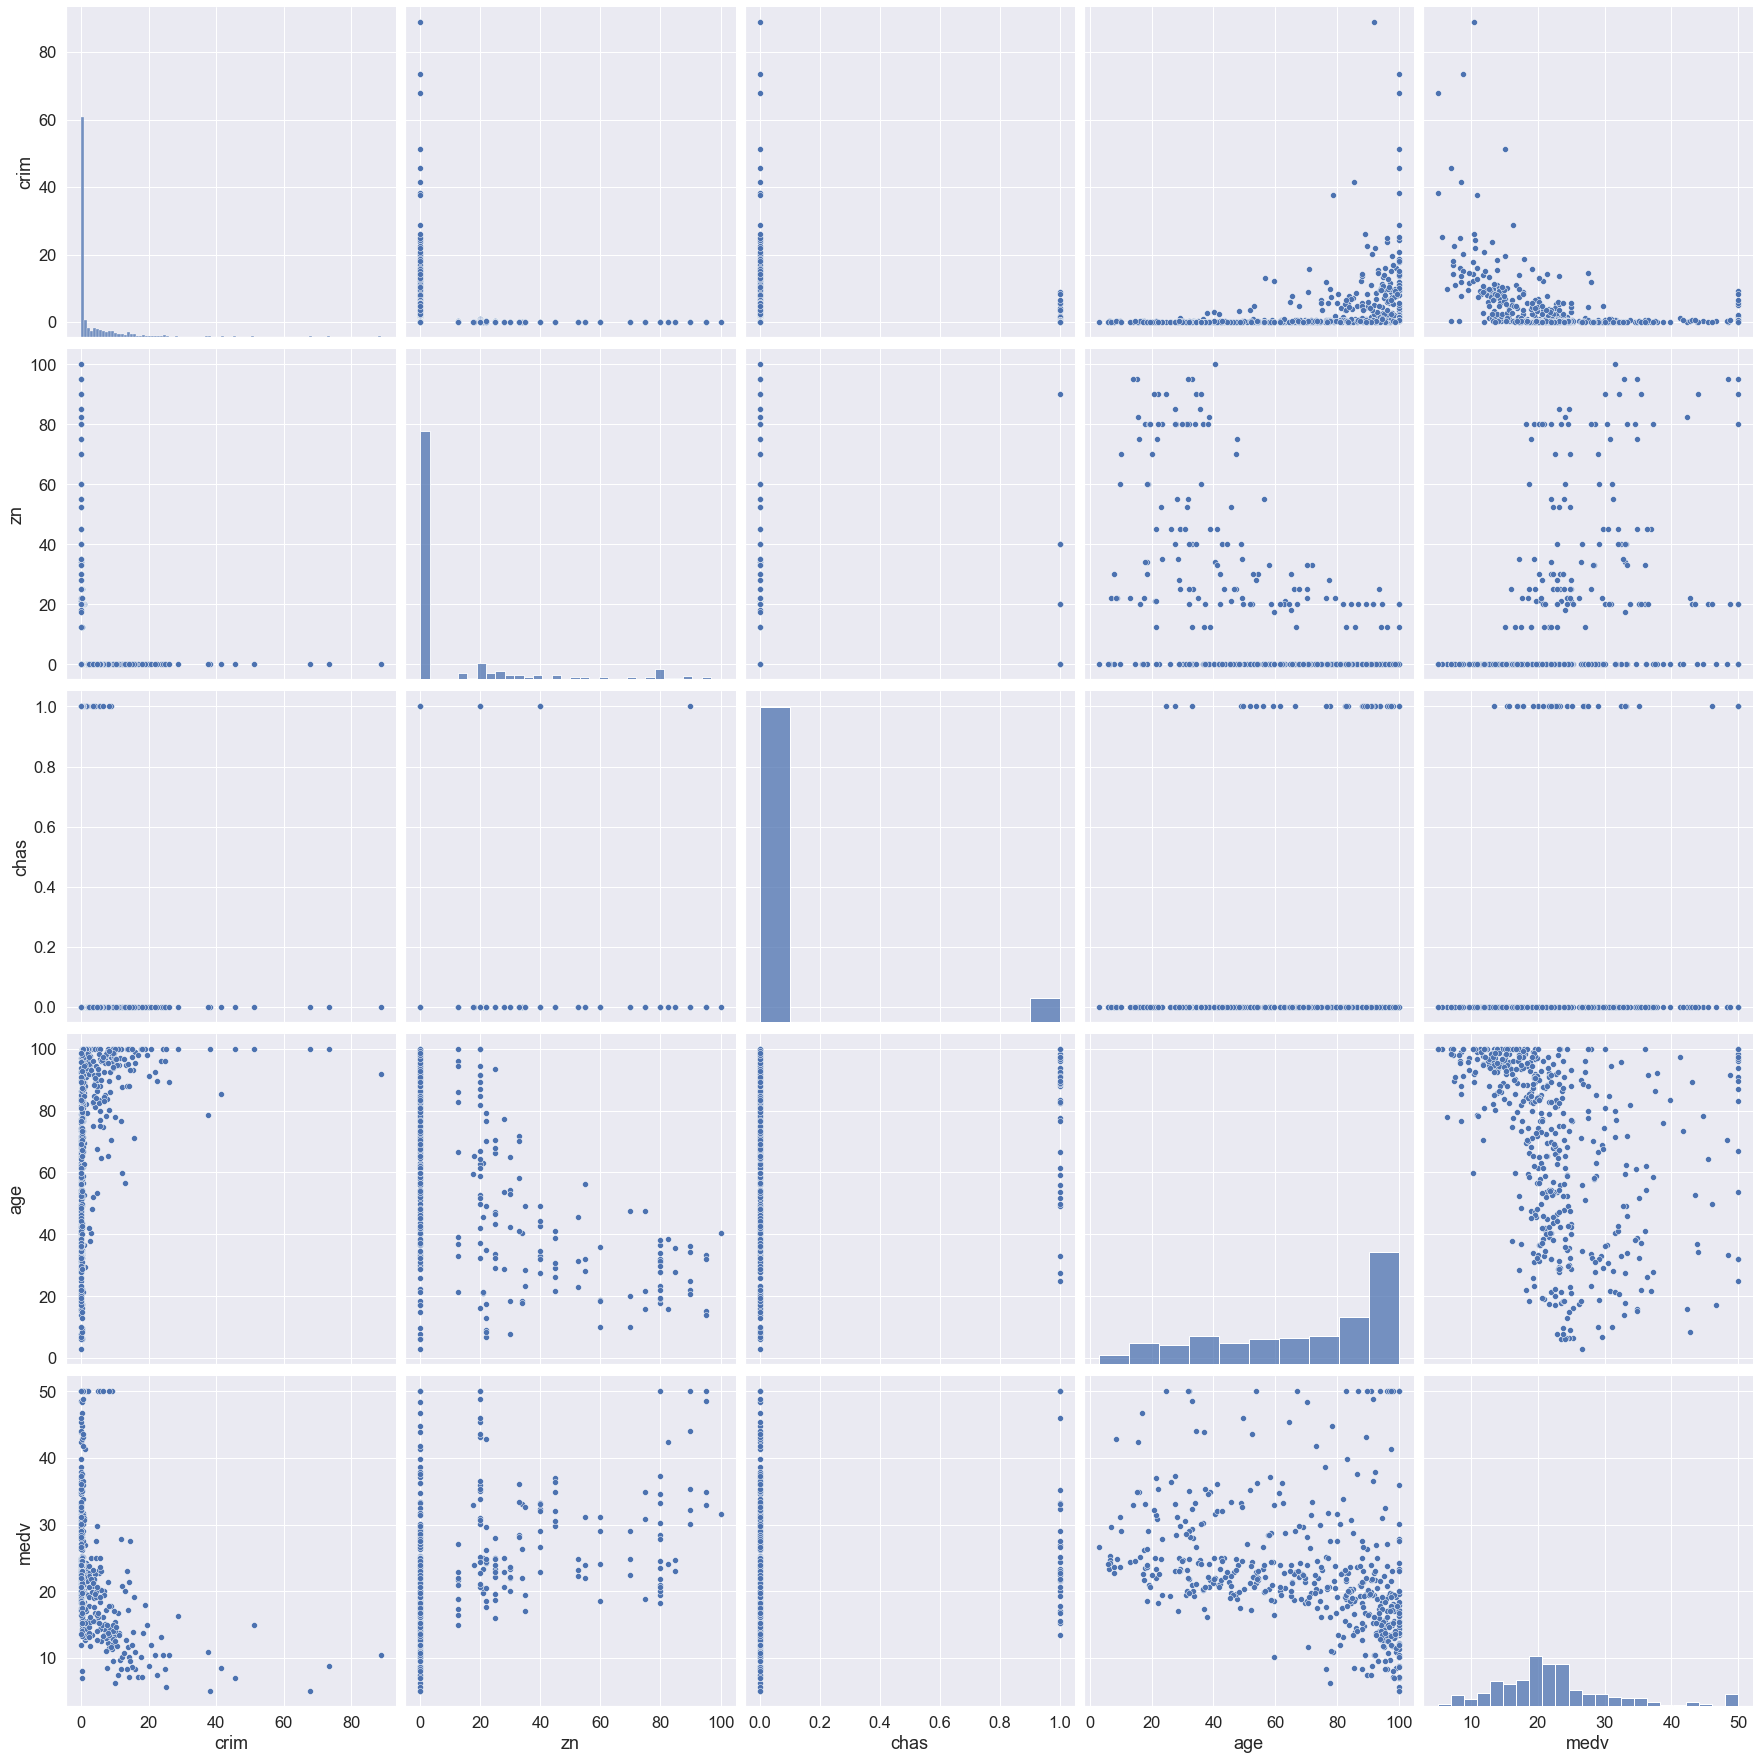

In [133]:
sns.pairplot(df[cols2], height=5)
plt.tight_layout
plt.show()

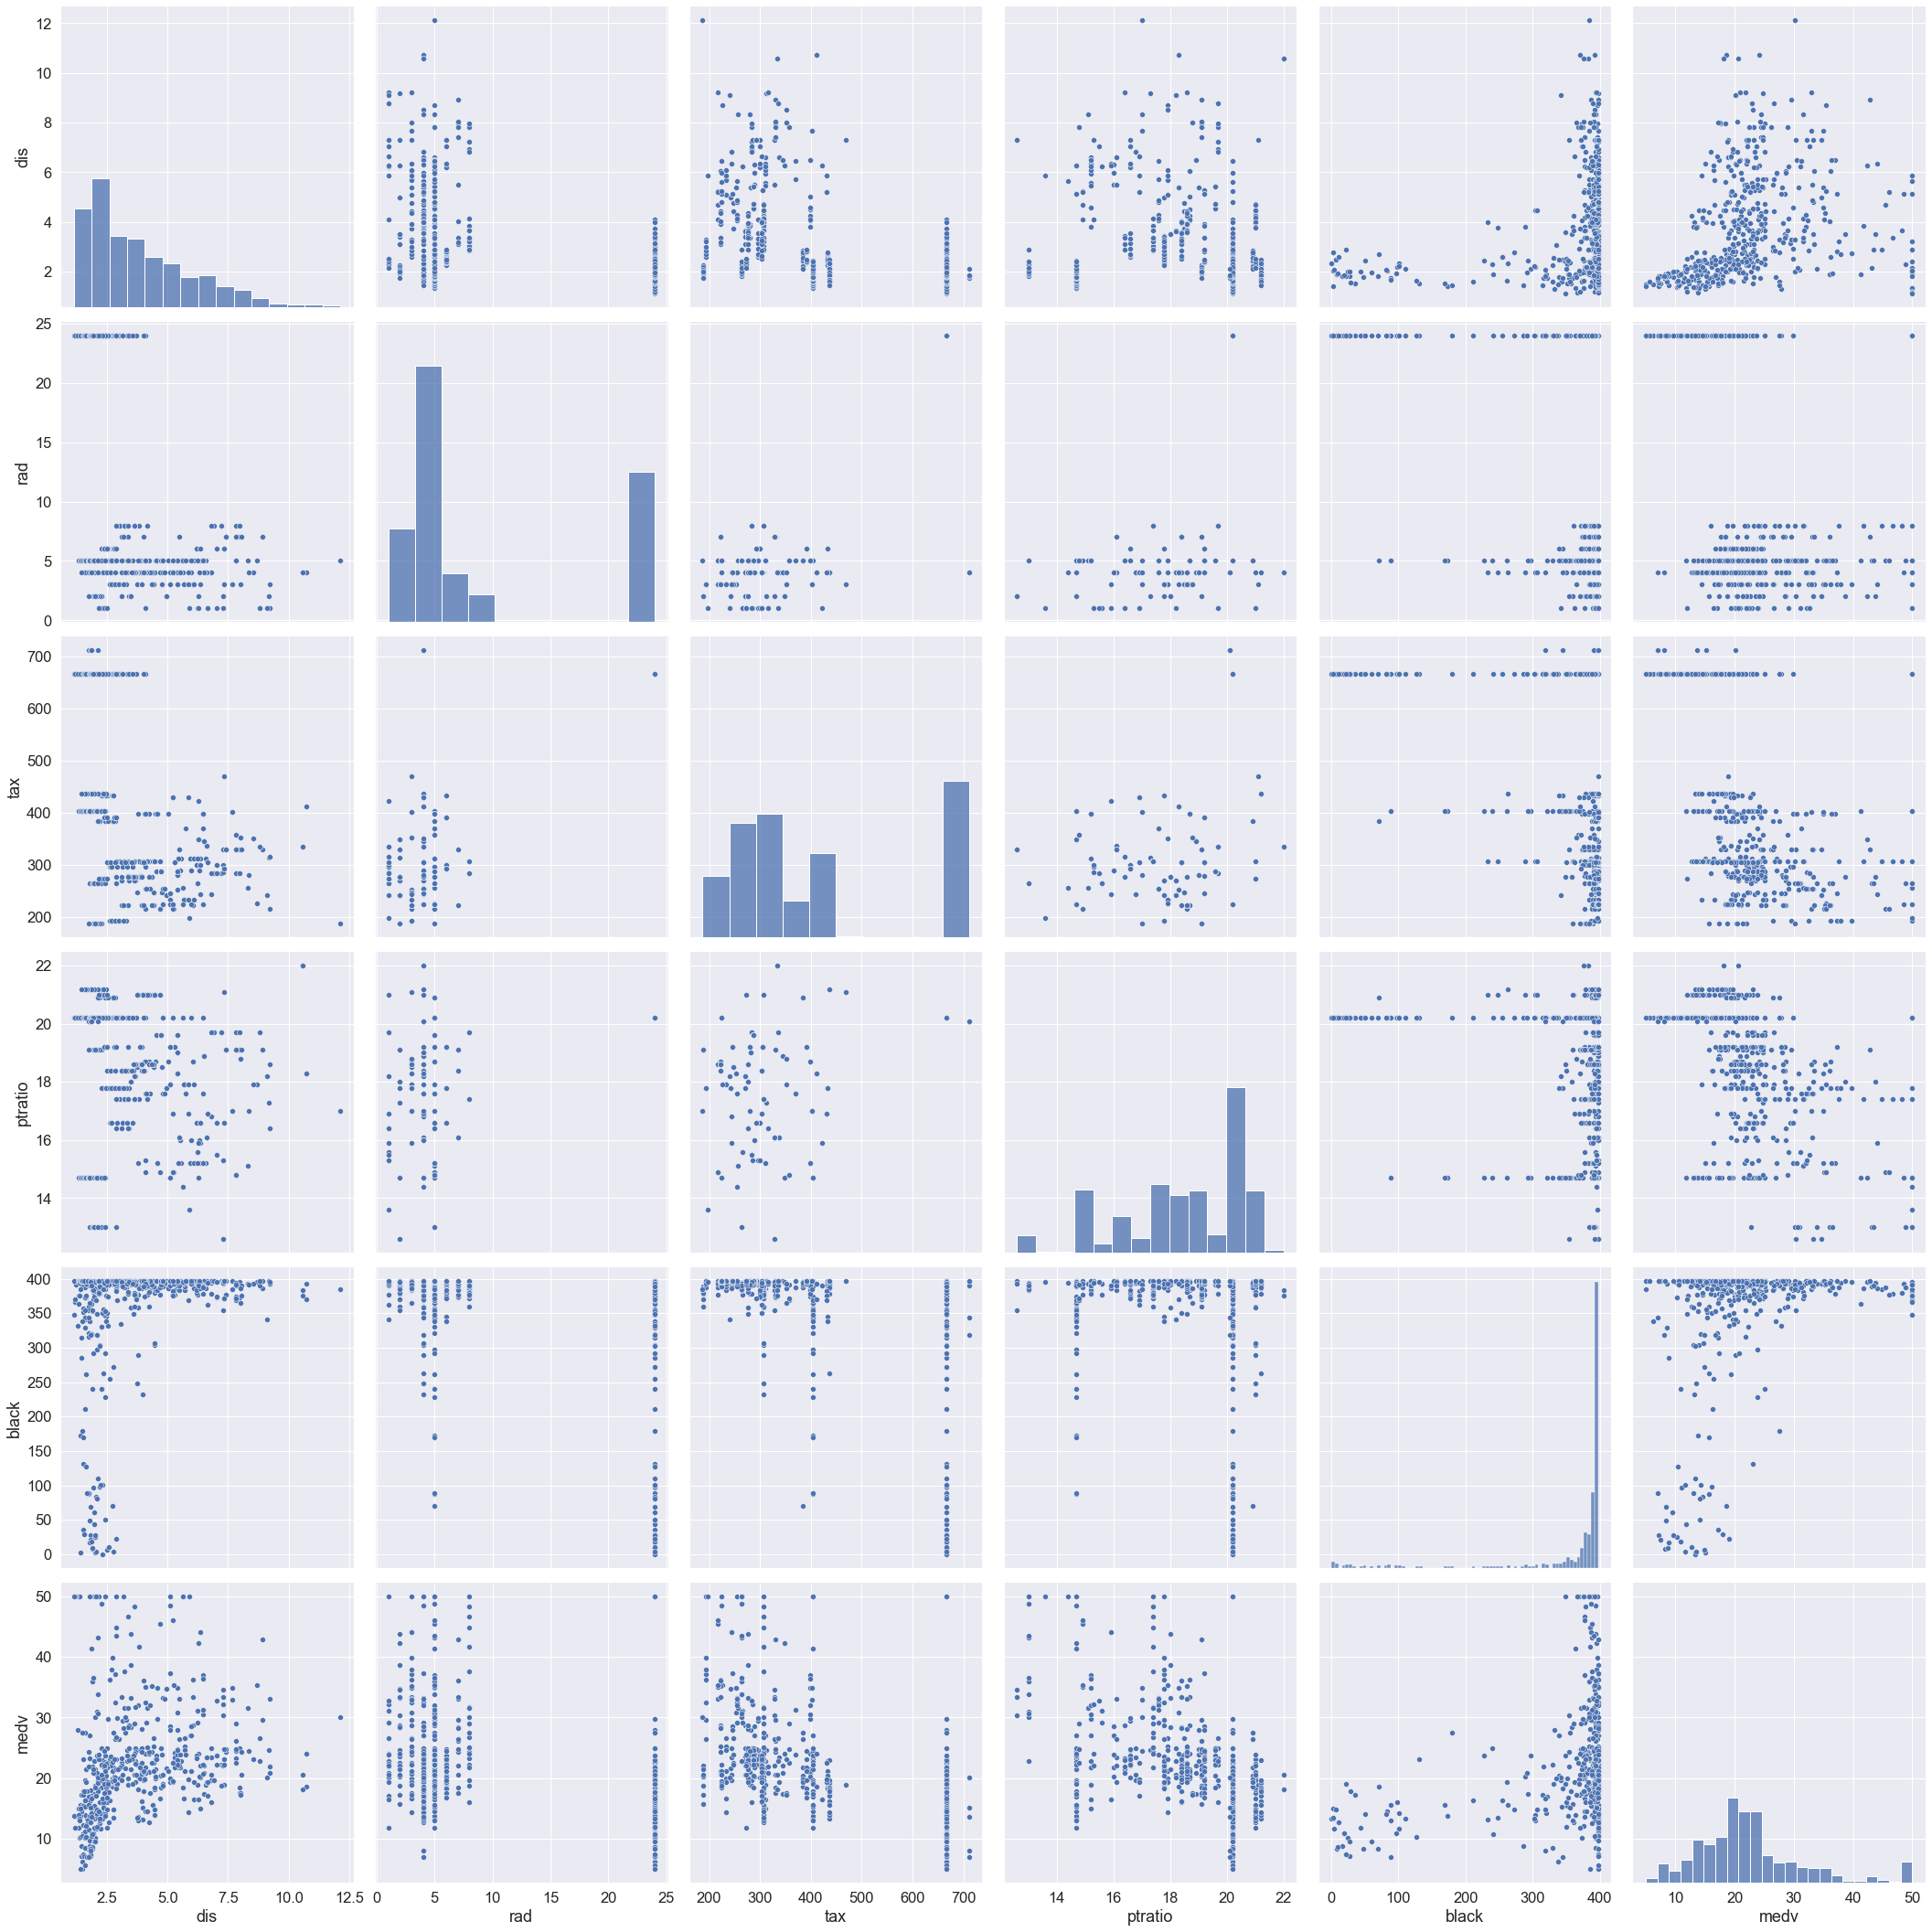

In [134]:
sns.pairplot(df[cols3], height=5)
plt.tight_layout
plt.show()

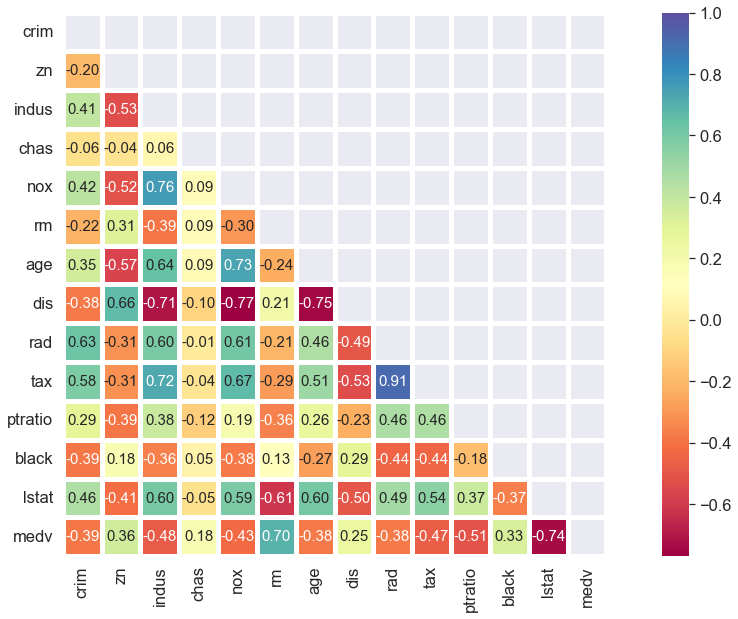

In [135]:
import numpy as np
cm = np.corrcoef(df.values.T)
sns.set(font_scale = 1.5, rc={'figure.figsize':(20,10)})
mask = np.triu(np.ones_like(cm), k=0) 
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels= df.columns,
                xticklabels= df.columns,
                cmap = 'Spectral',
                linewidths=5, 
                mask=mask,
                vmax=1)

plt.show()

Medv is my target. With MEDV the best correlation have RM (0.70) and LSTAT (-0.74). RM looks to have linear correlation with MEDVLSTAT little bit worse. So for  creation of function I will select RM and LSTA as features

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
X = df[['lstat','rm']].values
y = df['medv'].values

lr = LinearRegression()

lr.fit(X,y)
print('Nachylenie: %.3f' % lr.coef_[0])
print('Punkt przecięcia: %.3f' % lr.intercept_)



Nachylenie: -0.642
Punkt przecięcia: -1.358


Let's focus on data which ar enot outliers

In [138]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                            max_trials=100,
                            min_samples= 50,
                            loss='absolute_loss',
                            residual_threshold=5.0,
                            random_state=0)

ransac.fit(X,y)

c:\Users\andrz\Anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

In [139]:
print('Nachylenie: %.3f' % ransac.estimator_.coef_[0])
print('Punkt przecięcia: %.3f' % ransac.estimator_.intercept_)

Nachylenie: -0.693
Punkt przecięcia: -4.469


## Evaluation

Here I use all features

In [140]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


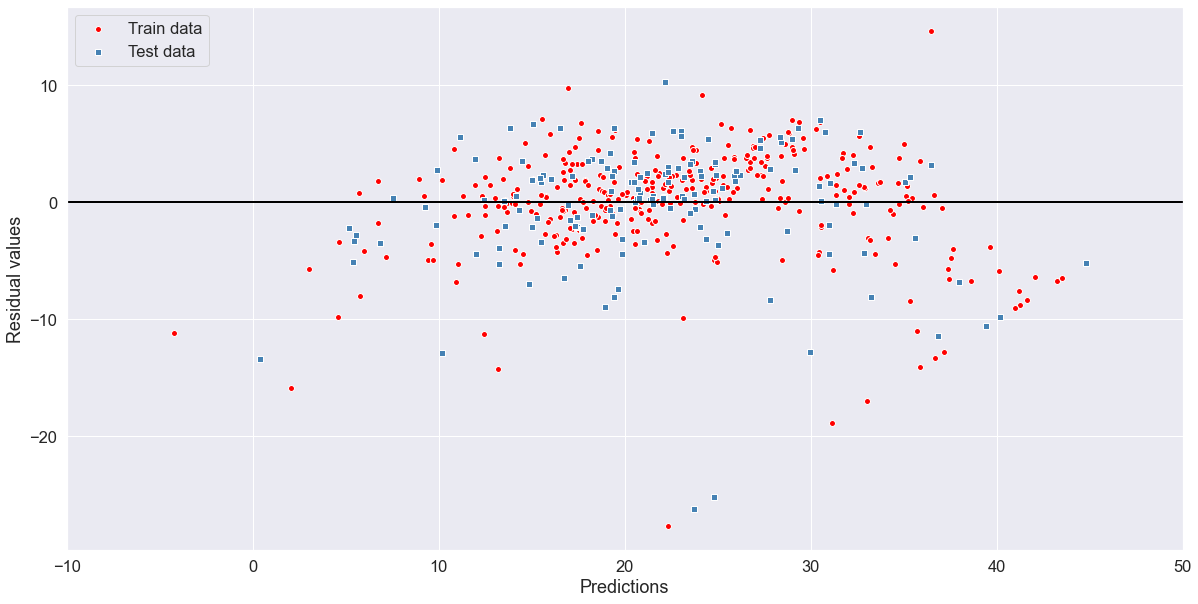

In [141]:
plt.scatter(y_train_pred, y_train_pred-y_train, c='red', marker='o', edgecolor='white', label='Train data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='steelblue', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predictions')
plt.ylabel('Residual values')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10,50])
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
print('MSE on train data: %.3f, MSE on test data: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE on train data: 19.958, MSE on test data: 27.196


MSE on test data is much higher - looks that we have overfitting here

In [143]:
from sklearn.metrics import r2_score
print('R2 score for train data is: %.3f and for test data is: %.3f' % (r2_score(y_train,y_train_pred), r2_score(y_test, y_test_pred)))

R2 score for train data is: 0.765 and for test data is: 0.673


Let's check the same for RANSAC

In [144]:
ransac = RANSACRegressor(LinearRegression(),
                            max_trials=100,
                            min_samples= 50,
                            loss='absolute_loss',
                            residual_threshold=5.0,
                            random_state=0)
ransac.fit(X_train, y_train)

y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)

print('MSE on train data: %.3f, MSE on test data: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R2 score for train data is: %.3f and for test data is: %.3f' % (r2_score(y_train,y_train_pred), r2_score(y_test, y_test_pred)))

MSE on train data: 24.509, MSE on test data: 35.480
R2 score for train data is: 0.711 and for test data is: 0.574


c:\Users\andrz\Anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


Let's change assumption and I will check if maybe better is here to focus in future on Polynomial approach - but I will use just RM feature

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

poly_regress_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

random_search = GridSearchCV(poly_regress_pipeline, {'polynomialfeatures__degree': range(1, 20)}, cv=3, verbose=1)
random_search.fit(df.rm.values.reshape(-1,1), df.medv.values)
random_search.best_params_

Fitting 3 folds for each of 19 candidates, totalling 57 fits


{'polynomialfeatures__degree': 2}

c:\Users\andrz\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\andrz\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


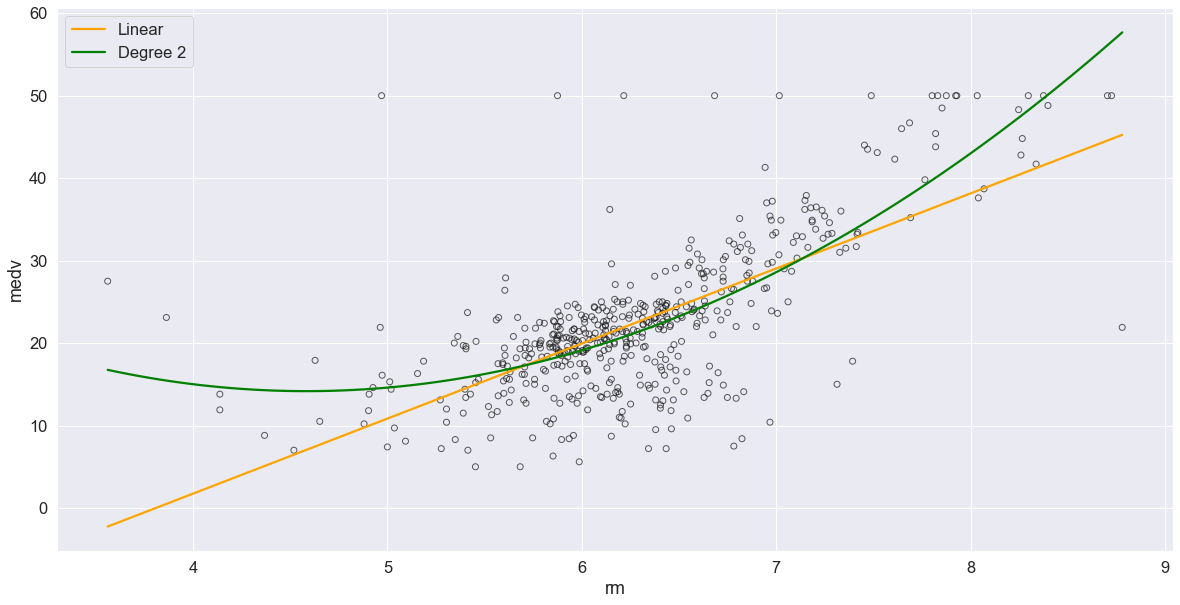

In [146]:
plt.scatter(df.rm, df.medv, facecolors='None', edgecolors='k', alpha=.7) 
sns.regplot(df.rm, df.medv, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(df.rm, df.medv, ci=None, label='Degree 2', order=2, scatter=False, color='green')
plt.legend()